# Explore the data

Useful imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import dirname, join as pjoin
import scipy.io
from IPython.display import Image


## Exploring .mat data
Exploring the .mat data located in the test_gt subdirectories in PLDM and PLDU

In [3]:
mat = scipy.io.loadmat('../data/raw/PLDM/test_gt/4')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Oct 25 19:46:13 2018',
 '__version__': '1.0',
 '__globals__': [],
 'groundTruth': array([[array([[(array([[0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0],
                        ...,
                        [0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),)]],
               dtype=[('Boundaries', 'O')])                        ]],
       dtype=object)}

The 4.mat file contains a dict with some overhead values like \_\_header__ and \_\_globals__. <br>
The file also contains one other key 'groundTruth' this seems to hold a array of arrays. <br>
I suspect this contains a information about which pixels the powerlines are in their respective image files. <br>
I an binary format 0 means no powerline, 1 means powerline.

In [4]:
mat['groundTruth']

array([[array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       ...,
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),)]],
              dtype=[('Boundaries', 'O')])                        ]],
      dtype=object)

I won't delve deeper into the files yet.

## Exploring the pre-computed results

This folder contains 4 subfolders each containing image files.

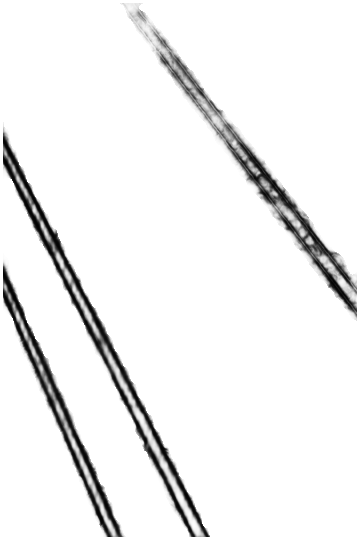

In [5]:
Image(filename='../data/raw/Pre-computed Results/PLDM/4_fuse.png')

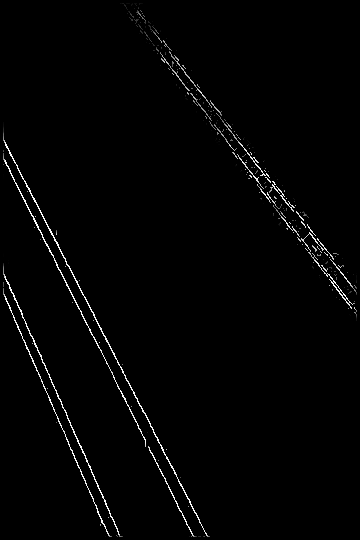

In [6]:
Image(filename='../data/raw/Pre-computed Results/PLDM-nms/4.png')

These files seem to contain images where the powerlines are marked. <br>
I don't know if these are labeled by another model or if they're labeled by humans. <br>

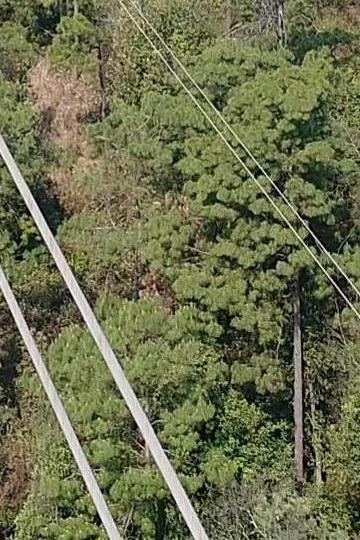

In [7]:
Image(filename='../data/raw/PLDM/test/4.jpg')

The pre-computed results seem to match the original file.

## Continuing with the .mat files

Decontructing the label rawdata.

In [8]:
gnd_truths = mat['groundTruth']
gnd_truths

array([[array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       ...,
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),)]],
              dtype=[('Boundaries', 'O')])                        ]],
      dtype=object)

In [10]:
sub_array5 = gnd_truths[0][0][0][0][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
sub_array5

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The datastructure of the .mat files are in several nested arrays.

The one I am interested in is the fifth sub array from the original .mat file.

This is where the pixel data is stored.

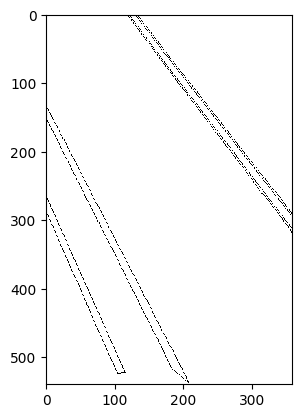

In [12]:
%matplotlib inline

plt.imshow(sub_array5, interpolation='none', cmap='binary')

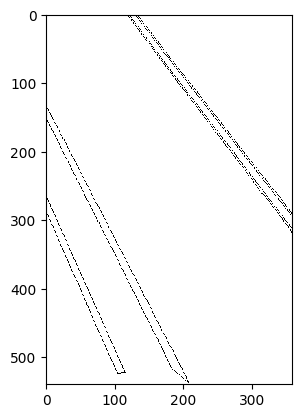

In [13]:
plt.imshow(sub_array5, interpolation='nearest', cmap='binary')

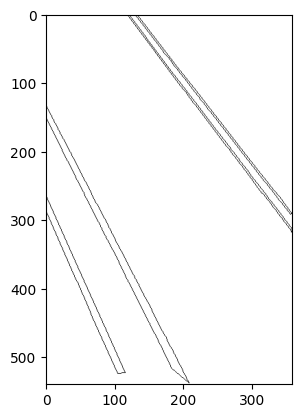

In [14]:
plt.imshow(sub_array5, interpolation='antialiased', cmap='binary')

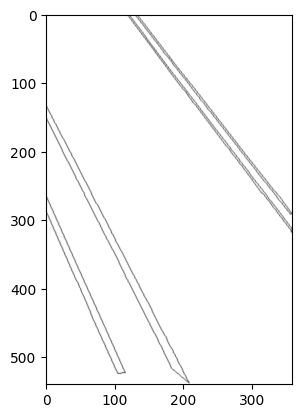

In [17]:
plt.imshow(sub_array5, interpolation='gaussian', cmap='binary')

This seems to confirm my initial assumptions.